In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split

In [2]:
def gerar_pontos(n):
    # Gerar n pontos uniformemente distribuídos no intervalo [0, 2pi]
    theta = np.random.uniform(0, 2*np.pi, n)
    # Gerar n raios com a distribuição correta usando a raiz quadrada
    r = np.sqrt(np.random.uniform(0, 1, n))
    # Coordenadas polares para cartesianas
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

def classificar_pontos(x, y):
    classificacao = []
    for i in range(len(x)):
        # o ponto esta acima do eixo x
        if y[i] >= 0:
            # o ponto está no primeiro quadrante
            if x[i] >= 0:
                # o ponto está abaixo da reta -x + 1
                if y[i] <= -x[i] + 1:
                    # clasificação c1
                    classificacao.append(1)
                else:
                    classificacao.append(5)
            # o ponto está no segundo quadrante
            else:
                # o ponto está abaixo da reta x + 1
                if y[i] <= x[i] + 1:
                    # clasificação c2
                    classificacao.append(2)
                else:
                    classificacao.append(6)
        # o ponto está abaixo do eixo x
        else:
            # o ponto está no terceiro quadrante
            if x[i] <= 0:
                # o ponto está acima da reta -x - 1
                if y[i] >= -x[i] - 1:
                    # clasificação c3
                    classificacao.append(3)
                else:
                    classificacao.append(7)
            # o ponto está no quarto quadrante
            else:
                # o ponto está acima da reta x - 1
                if y[i] >= x[i] - 1:
                    # clasificação c4
                    classificacao.append(4)
                else:
                    classificacao.append(8)

    return classificacao

### Criação dos dados

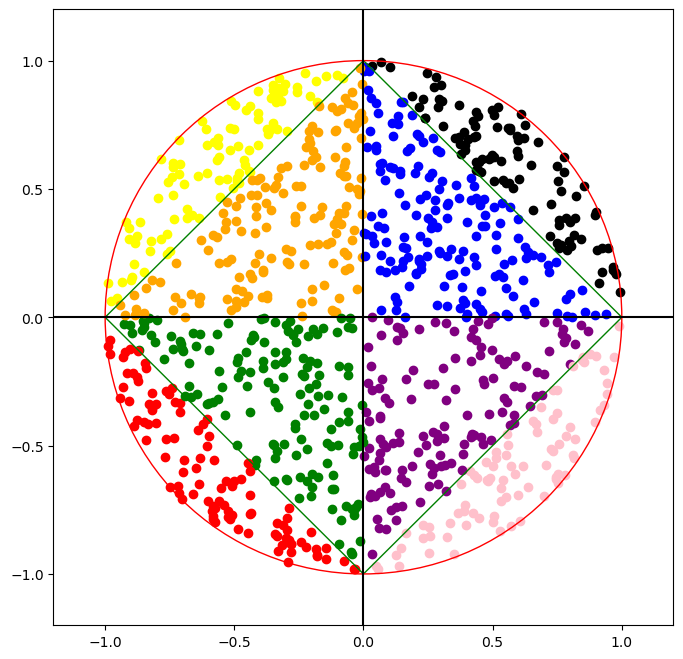

In [3]:
n = 1000
x, y = gerar_pontos(n)

# Classificar os pontos
classes = classificar_pontos(x, y)

# Mapeamento de cores para as classes
colors = {1: 'blue', 2: 'orange', 3: 'green', 4: 'purple',
          5: 'black', 6: 'yellow', 7: 'red', 8: 'pink'}

# Configurações do gráfico
plt.figure(figsize=(8, 8))
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

# Plotar os pontos coloridos pelas classes
for i in range(n):
    plt.scatter(x[i], y[i], color=colors[classes[i]])

# Plotar o círculo
circle = plt.Circle((0, 0), 1, color='r', fill=False)
losango = plt.Polygon([(-1, 0), (0, 1), (1, 0), (0, -1)], color='g', fill=False)
eixo_x = plt.Line2D([-1.5, 1.5], [0, 0], color='black')
eixo_y = plt.Line2D([0, 0], [-1.5, 1.5], color='black')
plt.gca().add_artist(eixo_x)
plt.gca().add_artist(eixo_y)
plt.gca().add_artist(losango)
plt.gca().add_artist(circle)
plt.show()


### Separação dos Dados

In [4]:
X = np.array([x, y])
X = X.T
y = np.array(classes) -1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=32)

num_neuronios = int((x_train.shape[0] - 10)/(10*(x_train.shape[1] + 2)))
print(x_train.shape[0], x_train.shape[1], num_neuronios)

640 2 15


### Treinamento do Modelo sem momentum

Epoch 1/100


c:\Users\ivoar\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0498 - loss: 2.0739 - val_accuracy: 0.1063 - val_loss: 2.0514
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1074 - loss: 2.0448 - val_accuracy: 0.1250 - val_loss: 2.0286
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1529 - loss: 2.0177 - val_accuracy: 0.1750 - val_loss: 2.0063
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2003 - loss: 1.9960 - val_accuracy: 0.1937 - val_loss: 1.9856
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2449 - loss: 1.9710 - val_accuracy: 0.2313 - val_loss: 1.9652
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2700 - loss: 1.9523 - val_accuracy: 0.2500 - val_loss: 1.9447
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2914 - loss: 1.9357 - val_accuracy: 0.2750 - val_loss: 1.9246
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3513 - loss: 1.9153 - val_accuracy: 0.2875 - val_loss: 1.

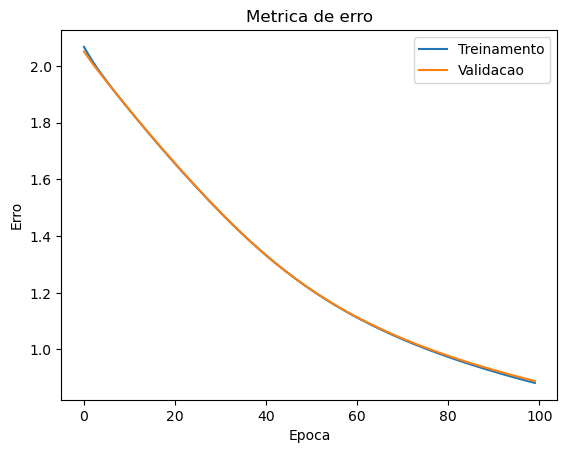

In [5]:
model = Sequential()
model.add(Dense(num_neuronios, input_dim=2, activation='selu', kernel_initializer='normal'))
model.add(Dense(8, activation='softmax'))


# SGD sem momentum
sgd = SGD(learning_rate=0.01, momentum=0.0)

# Compilar o modelo com sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# para o treinamento caso a rede não melhore após 20 épocas
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[es])


 # Avalia o modelo
_, accuracy_val = model.evaluate(x_val, y_val, batch_size=32, verbose=0)
print(f'--> Acuracia (validacao): {accuracy_val:.4f}')

# Exibe o historico de treinamento para um fold especifico
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'], loc='upper right')
plt.show()

### Predição dos dados de teste

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
--> Acuracia (teste): 0.8750


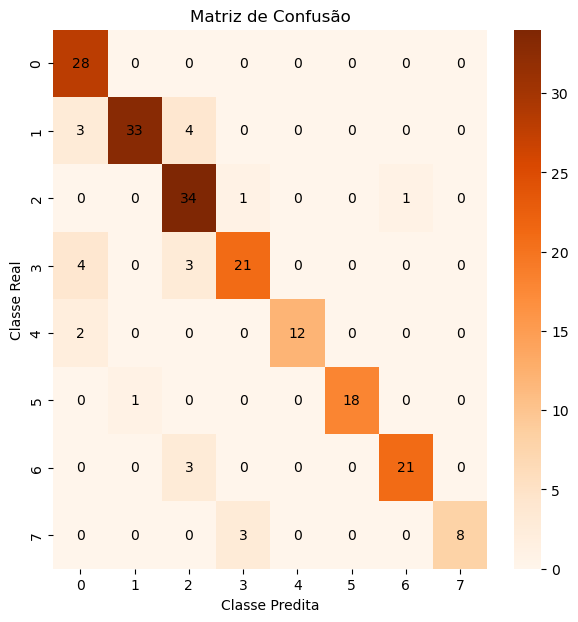

In [6]:
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis=1)

# Avalia o modelo
_, accuracy_test = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print(f'--> Acuracia (teste): {accuracy_test:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']

# Matriz de confusão
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(7, 7))  # Aumenta o tamanho da figura
sns.heatmap(cm, fmt="d", cmap="Oranges",
            annot_kws={"size": 12})  # Aumenta o tamanho da fonte

# coloca os numeros em todos os quadrados
for i in range(len(labels)):
    for j in range(len(labels)):
        text = plt.text(j+0.5, i+0.5, cm[i, j],
                       ha="center", va="center", color="black")


plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão")
plt.show()


### Treinamento do Modelo usando o momentum

Epoch 1/100


c:\Users\ivoar\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1952 - loss: 1.9855 - val_accuracy: 0.2688 - val_loss: 1.7364
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3980 - loss: 1.6667 - val_accuracy: 0.7063 - val_loss: 1.4553
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6595 - loss: 1.3825 - val_accuracy: 0.6250 - val_loss: 1.2111
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6752 - loss: 1.1761 - val_accuracy: 0.6750 - val_loss: 1.0462
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - loss: 1.0164 - val_accuracy: 0.8313 - val_loss: 0.9119
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8114 - loss: 0.8820 - val_accuracy: 0.7500 - val_loss: 0.8111
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8309 - loss: 0.7717 - val_accuracy: 0.9438 - val_loss: 0.7289
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8690 - loss: 0.7029 - val_accuracy: 0.7500 - val_loss: 0.6

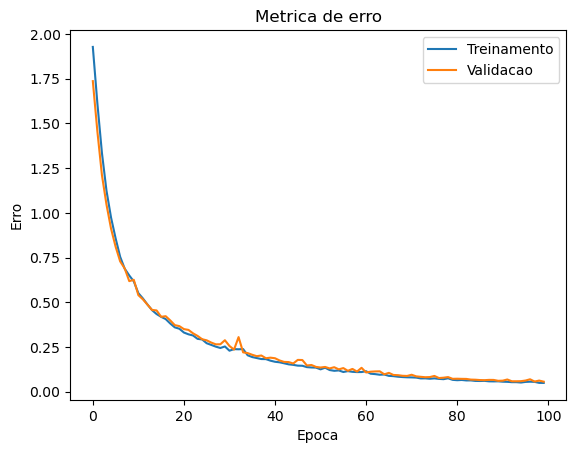

In [7]:
X = np.array([x, y])
X = X.T
y = np.array(classes) -1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=32)

funcoes = ['sigmoid', 'relu', 'selu', 'tanh', 'linear']
n = 2

model = Sequential()
model.add(Dense(num_neuronios, input_dim=2, activation=funcoes[n], kernel_initializer='normal'))
model.add(Dense(8, activation='softmax'))


# SGD com momentum
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilar o modelo com sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# para o treinamento caso a rede não melhore após 20 épocas
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[es])


 # Avalia o modelo
_, accuracy_val = model.evaluate(x_val, y_val, batch_size=32, verbose=0)
print(f'--> Acuracia (validacao): {accuracy_val:.4f}')

# Exibe o historico de treinamento para um fold especifico
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'], loc='upper right')
plt.show()

### Predição dos dados de teste

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
--> Acuracia (teste): 0.9950


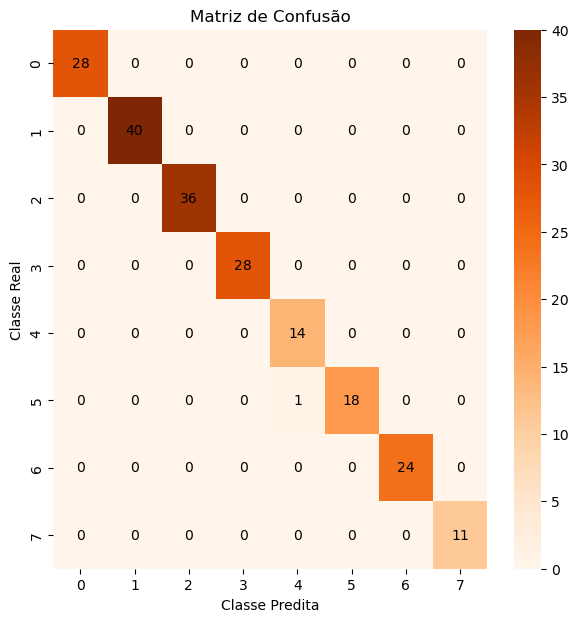

In [8]:
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis=1)

# Avalia o modelo
_, accuracy_test = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print(f'--> Acuracia (teste): {accuracy_test:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']

# Matriz de confusão
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(7, 7))  # Aumenta o tamanho da figura
sns.heatmap(cm, fmt="d", cmap="Oranges",
            annot_kws={"size": 12})  # Aumenta o tamanho da fonte

# coloca os numeros em todos os quadrados
for i in range(len(labels)):
    for j in range(len(labels)):
        text = plt.text(j+0.5, i+0.5, cm[i, j],
                       ha="center", va="center", color="black")


plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão")
plt.show()